# Telco Customer Churning

Import standard library

In [75]:
import pandas as pd

import plotting libraries

In [76]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

Read data

In [77]:
df=pd.read_csv('C:\\Users\\admin\\Desktop\\Telco-Customer-Churn.csv')

Check out the Data

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.shape

(7043, 21)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting Total Charges to a numerical data type.

In [81]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


check total  number of missing  value 

In [83]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Remove missing values

In [84]:
df.dropna(inplace = True)

In [85]:
df.shape

(7032, 21)

# Demographics

In [86]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Converting SeniorCitizen variable to Yes and No

In [97]:
df['SeniorCitizen'].replace(to_replace=1,value='Yes',inplace=True)
df['SeniorCitizen'].replace(to_replace=0,value='No',inplace=True)

Which Demographics are the most popular with Telco Brand?

In [103]:
churn_no=df[df['Churn']=='No']
churn_yes=df[df['Churn']=='Yes']
churn_no.groupby(['gender','SeniorCitizen','Partner','Dependents'])['customerID'].count()

gender  SeniorCitizen  Partner  Dependents
Female  No             No       No            909
                                Yes           110
                       Yes      No            482
                                Yes           715
        Yes            No       No            159
                                Yes             2
                       Yes      No            136
                                Yes            31
Male    No             No       No            963
                                Yes           166
                       Yes      No            439
                                Yes           713
        Yes            No       No            126
                                Yes             4
                       Yes      No            176
                                Yes            32
Name: customerID, dtype: int64

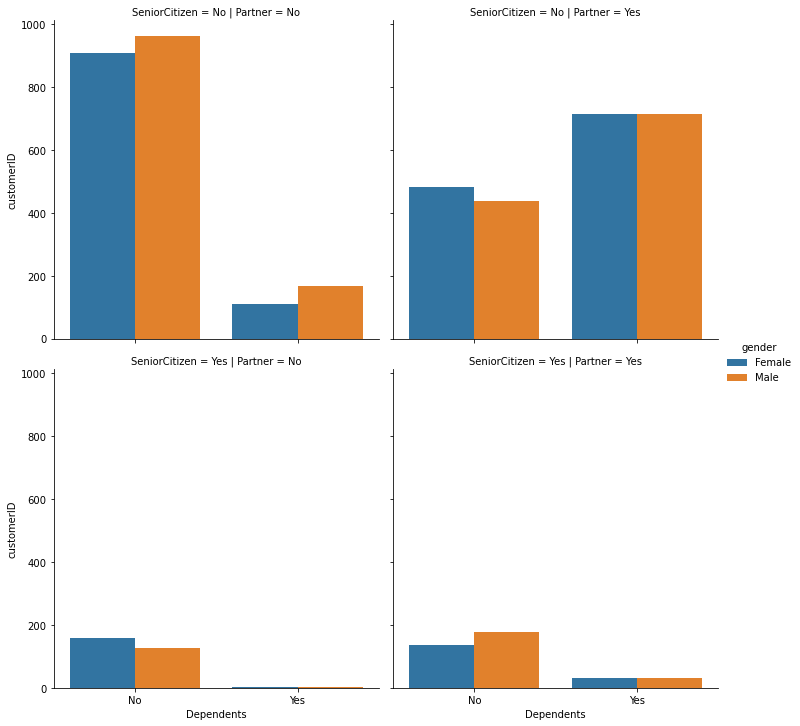

In [102]:
demo_no=churn_no.groupby(['gender','SeniorCitizen','Partner','Dependents'])['customerID'].count().reset_index()
sns.catplot(data=demo_no,x='Dependents',y='customerID',row='SeniorCitizen',col='Partner',hue='gender',kind='bar')

Demographics popular with Telco are: 
1. young people single people no dependents.
2. married young people with dependents.

Which customers are leaving Telco in terms of Demographics?

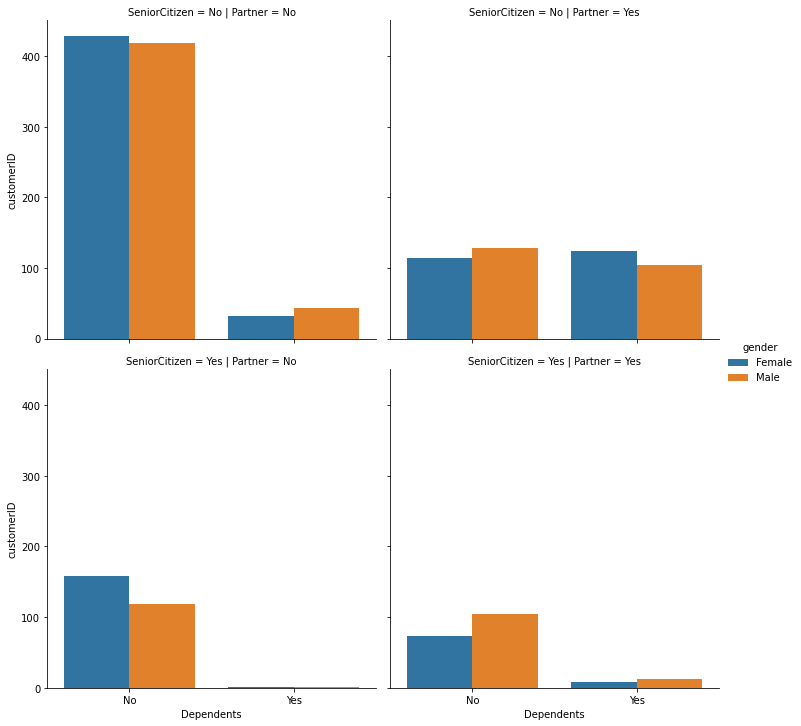

In [128]:
demo_yes=churn_yes.groupby(['gender','SeniorCitizen','Partner','Dependents'])['customerID'].count().reset_index()
sns.catplot(data=demo_yes,x='Dependents',y='customerID',row='SeniorCitizen',col='Partner',hue='gender',kind='bar')

Most people leaving Telco are single Senior citizens with no dependents.

# Services

Checking which services that contribute to higher monthly charges and resulting to customers churning

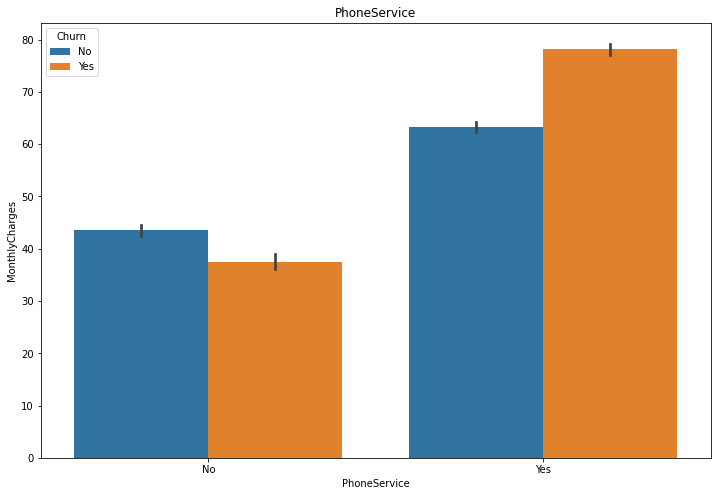

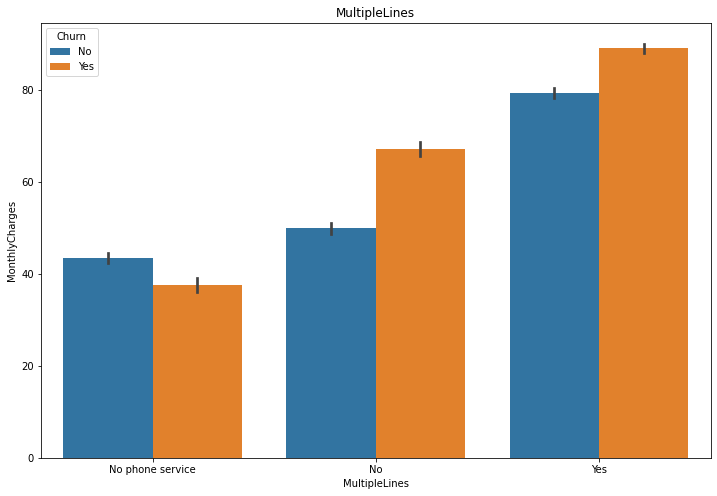

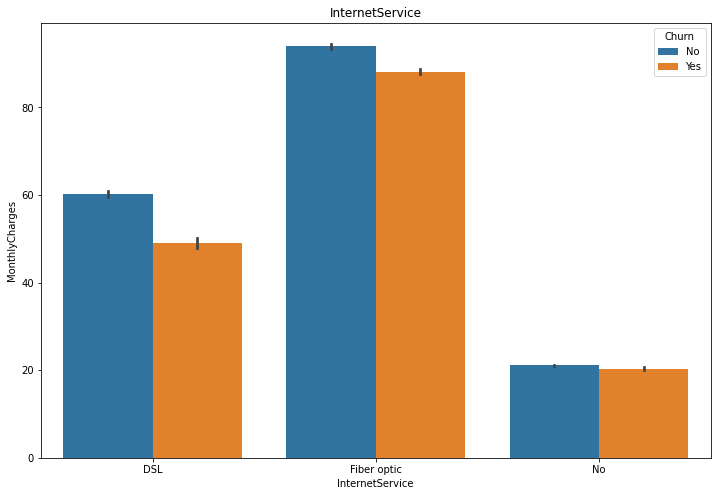

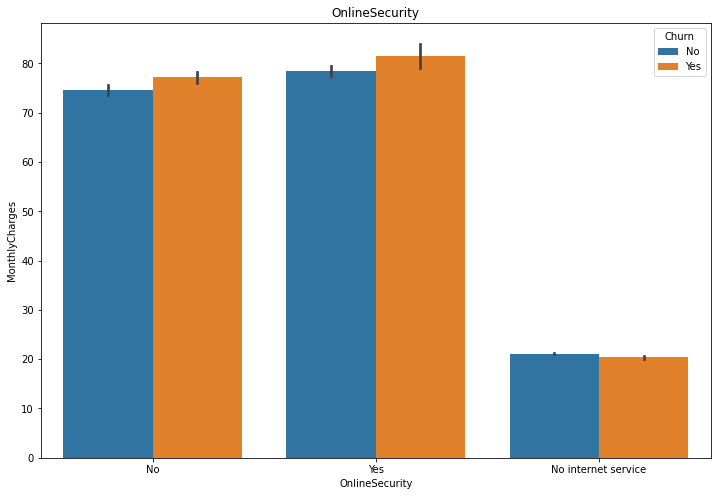

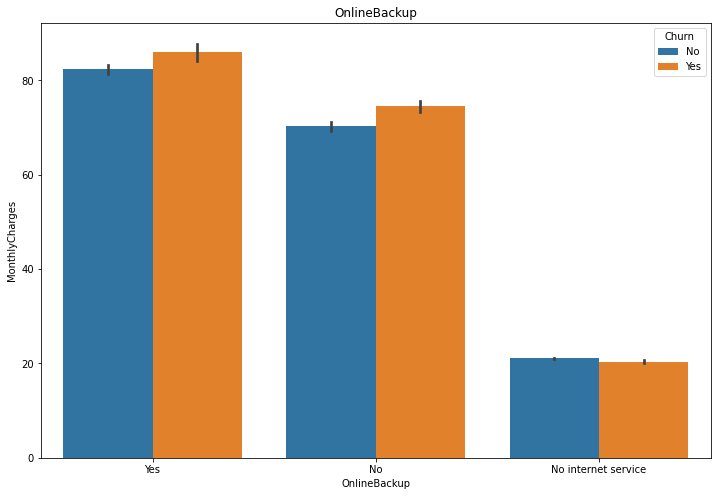

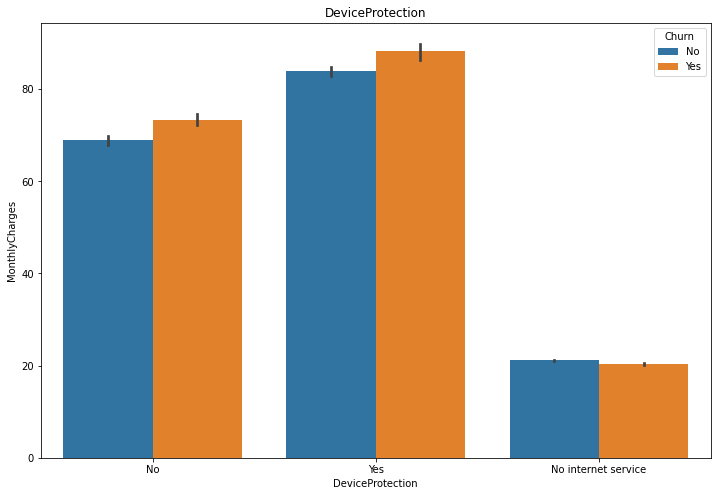

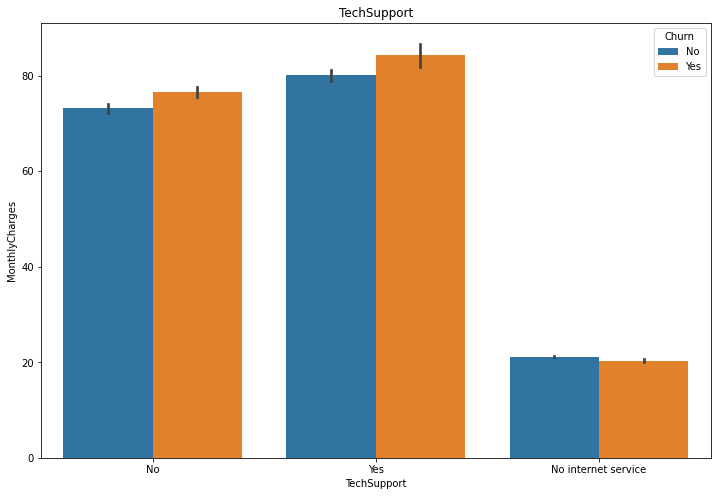

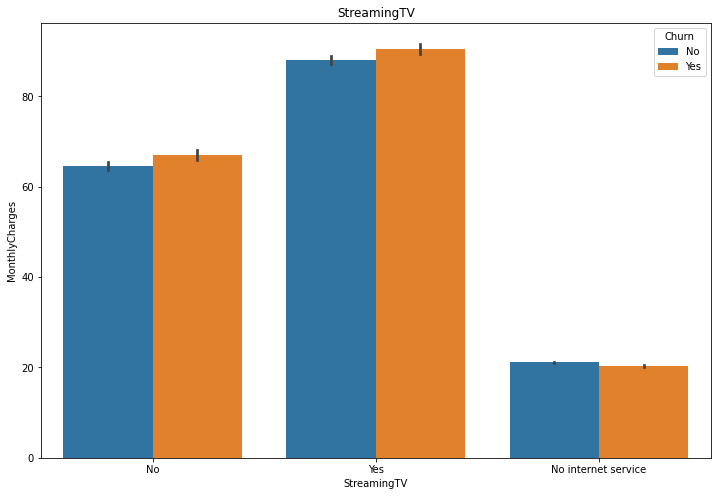

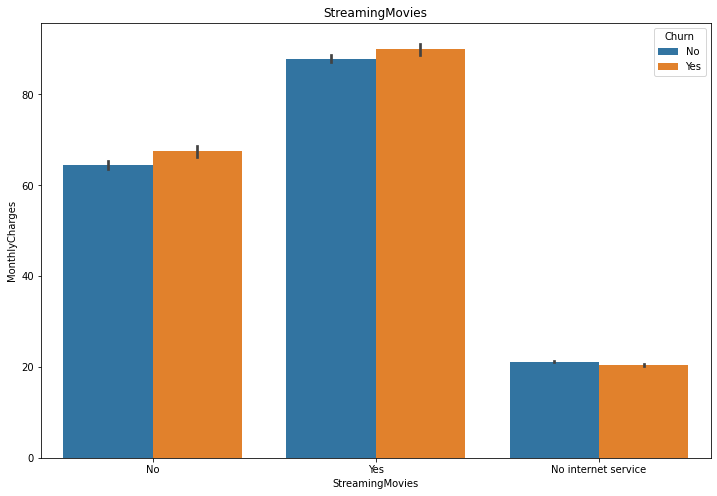

In [129]:
services=['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
          'TechSupport','StreamingTV', 'StreamingMovies']

for service in services:
    plt.figure(figsize=(12,8))
    sns.barplot(x=service,y='MonthlyCharges',data=df,hue='Churn')
    plt.title(service)
    plt.show()

If Telco was to offer phone service as a standalone service, which type of contract would encourage customer retention?

In [130]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [132]:
phone_service=df[df['PhoneService']=='Yes']

<AxesSubplot:xlabel='Contract', ylabel='count'>

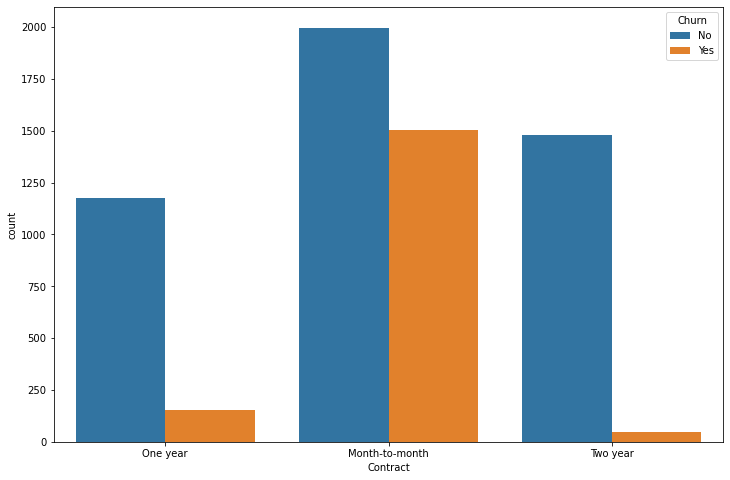

In [138]:
plt.figure(figsize=(12,8))
sns.countplot(data= phone_service,x='Contract',hue='Churn')

Two year contracts are more recommended in this case since it has the least churn.

# Payment

If Telco was to provide three bouquet packages, what monthly prices will be appropriate for the following packages to keep 
customers from churning:

    a. Basic
    
    b. Plus
    
    c. Premium

<Figure size 864x576 with 0 Axes>

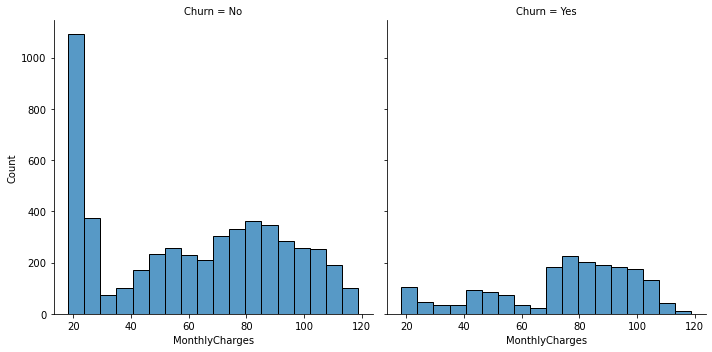

In [137]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='MonthlyCharges',col='Churn')

Considering both graphs, the following bouquet packages are recommended:

    Basic   = $20
    
    Plus    = $65
    
    Premium = $80

Also used a boxplot to decide on the different bouquet packages

<AxesSubplot:xlabel='MonthlyCharges'>

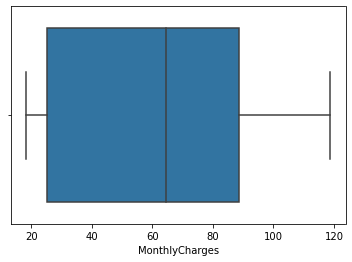

In [143]:
sns.boxplot(x=churn_no['MonthlyCharges'])

In [144]:
churn_no['MonthlyCharges'].describe()

count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: MonthlyCharges, dtype: float64

Looking at the boxplot and using quartiles, the following bouquet packages are recommended:

 Basic   = $25
    
 Plus    = $64
    
 Premium = $88